In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../input/1000-projects-crowdfunding-data/Crowdfunding_data_1000_projects.xlsx")

In [3]:
df1 = df.loc[:,["Goal","num_donors","funding_status"]]

In [4]:
df1.head()

,Goal,num_donors,funding_status
0,887.15,7,completed
1,761.52,3,NotCompleted
2,266.55,6,completed
3,808.15,1,NotCompleted
4,1296.65,1,NotCompleted


Convert values in column funding_status from text to integers (completed=1; NotCompleted=0)

In [5]:
df1["funding_status"]=np.where(df1.funding_status=="completed",1,0)
df1.head()

,Goal,num_donors,funding_status
0,887.15,7,1
1,761.52,3,0
2,266.55,6,1
3,808.15,1,0
4,1296.65,1,0


In [6]:
x = df1.iloc[:,[0,1]]
y = df1.iloc[:,2]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model =  DecisionTreeClassifier()

In [11]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
from sklearn import tree

In [13]:
decisions = tree.export_text(model)
print(decisions)

|--- feature_1 <= 1.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 204.20
|   |   |   |--- class: 1
|   |   |--- feature_0 >  204.20
|   |   |   |--- feature_0 <= 393.06
|   |   |   |   |--- feature_0 <= 250.47
|   |   |   |   |   |--- feature_0 <= 212.72
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  212.72
|   |   |   |   |   |   |--- feature_0 <= 222.65
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  222.65
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  250.47
|   |   |   |   |   |--- feature_0 <= 258.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  258.43
|   |   |   |   |   |   |--- feature_0 <= 376.71
|   |   |   |   |   |   |   |--- feature_0 <= 320.23
|   |   |   |   |   |   |   |   |--- feature_0 <= 275.63
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 272.98
|   |   |   |   |   |   |   |   

In [14]:
#fig = plt.figure(figsize=(25,20))
#a= tree.plot_tree(model)

In [15]:
import graphviz
re = tree.export_graphviz(model)

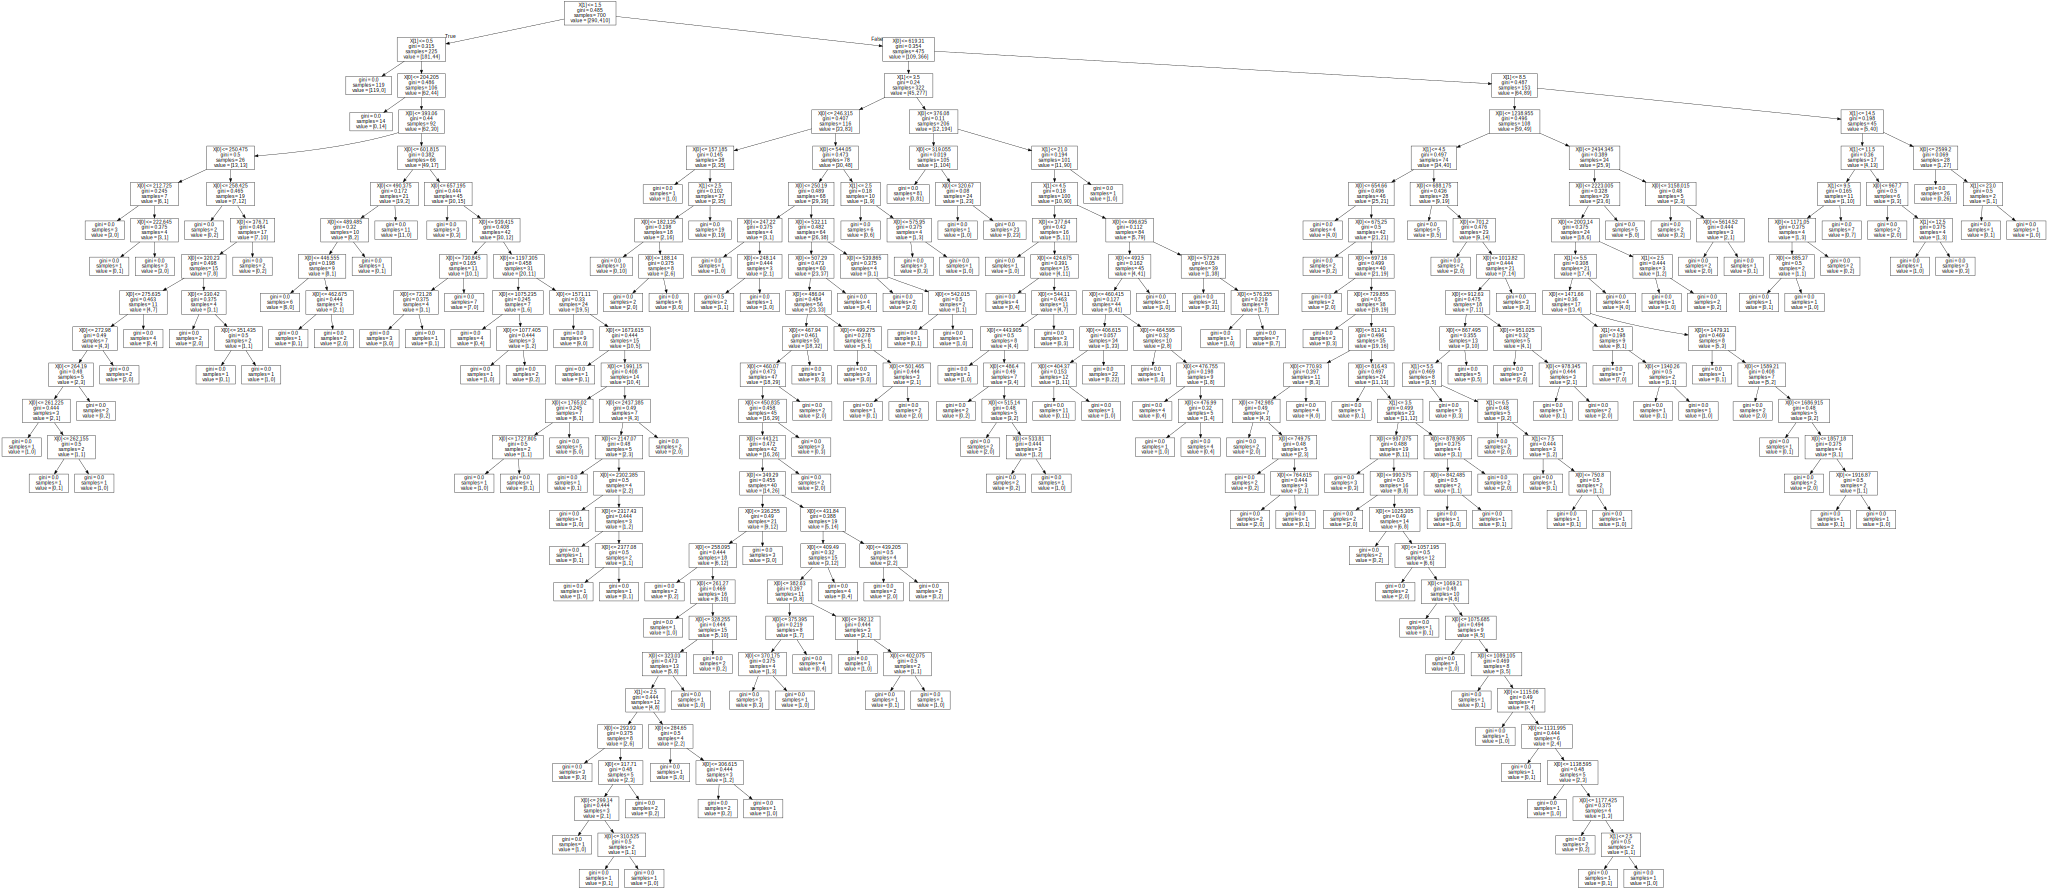

In [16]:
graph = graphviz.Source(re, format="png") 
graph

#4. Use test data-frame to show confusion matrix and model accuracy (2 points).

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [18]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 83,  34],
       [ 44, 139]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


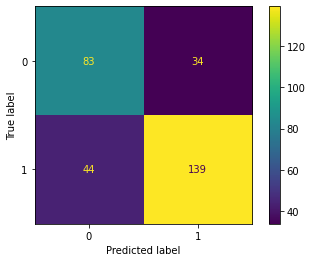

In [19]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [20]:
model.score(x_test,y_test)# model accuracy on test data

0.74

In [21]:
df2 = df1.iloc[:,[0,2]]
df2.head()

,Goal,funding_status
0,887.15,1
1,761.52,0
2,266.55,1
3,808.15,0
4,1296.65,0


In [22]:
x = df2.iloc[:,[0]]
y = df2.iloc[:,[1]]

In [23]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size=0.3)

In [24]:
model_1 =  DecisionTreeClassifier()

In [25]:
model_1.fit(x_train_1, y_train_1)

DecisionTreeClassifier()

In [26]:
decisions_1 = tree.export_text(model_1)
print(decisions_1)

|--- feature_0 <= 641.21
|   |--- feature_0 <= 310.31
|   |   |--- feature_0 <= 190.48
|   |   |   |--- feature_0 <= 157.30
|   |   |   |   |--- feature_0 <= 157.04
|   |   |   |   |   |--- feature_0 <= 156.91
|   |   |   |   |   |   |--- feature_0 <= 155.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  155.82
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  156.91
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  157.04
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  157.30
|   |   |   |   |--- feature_0 <= 172.58
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  172.58
|   |   |   |   |   |--- feature_0 <= 173.26
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  173.26
|   |   |   |   |   |   |--- feature_0 <= 188.14
|   |   |   |   |   |   |   |--- feature_0 <= 187.79
|   |   |   |   |   |   |   |   |--- feature_0 <= 178.25
|   |   | 

In [27]:
import graphviz
re = tree.export_graphviz(model_1)

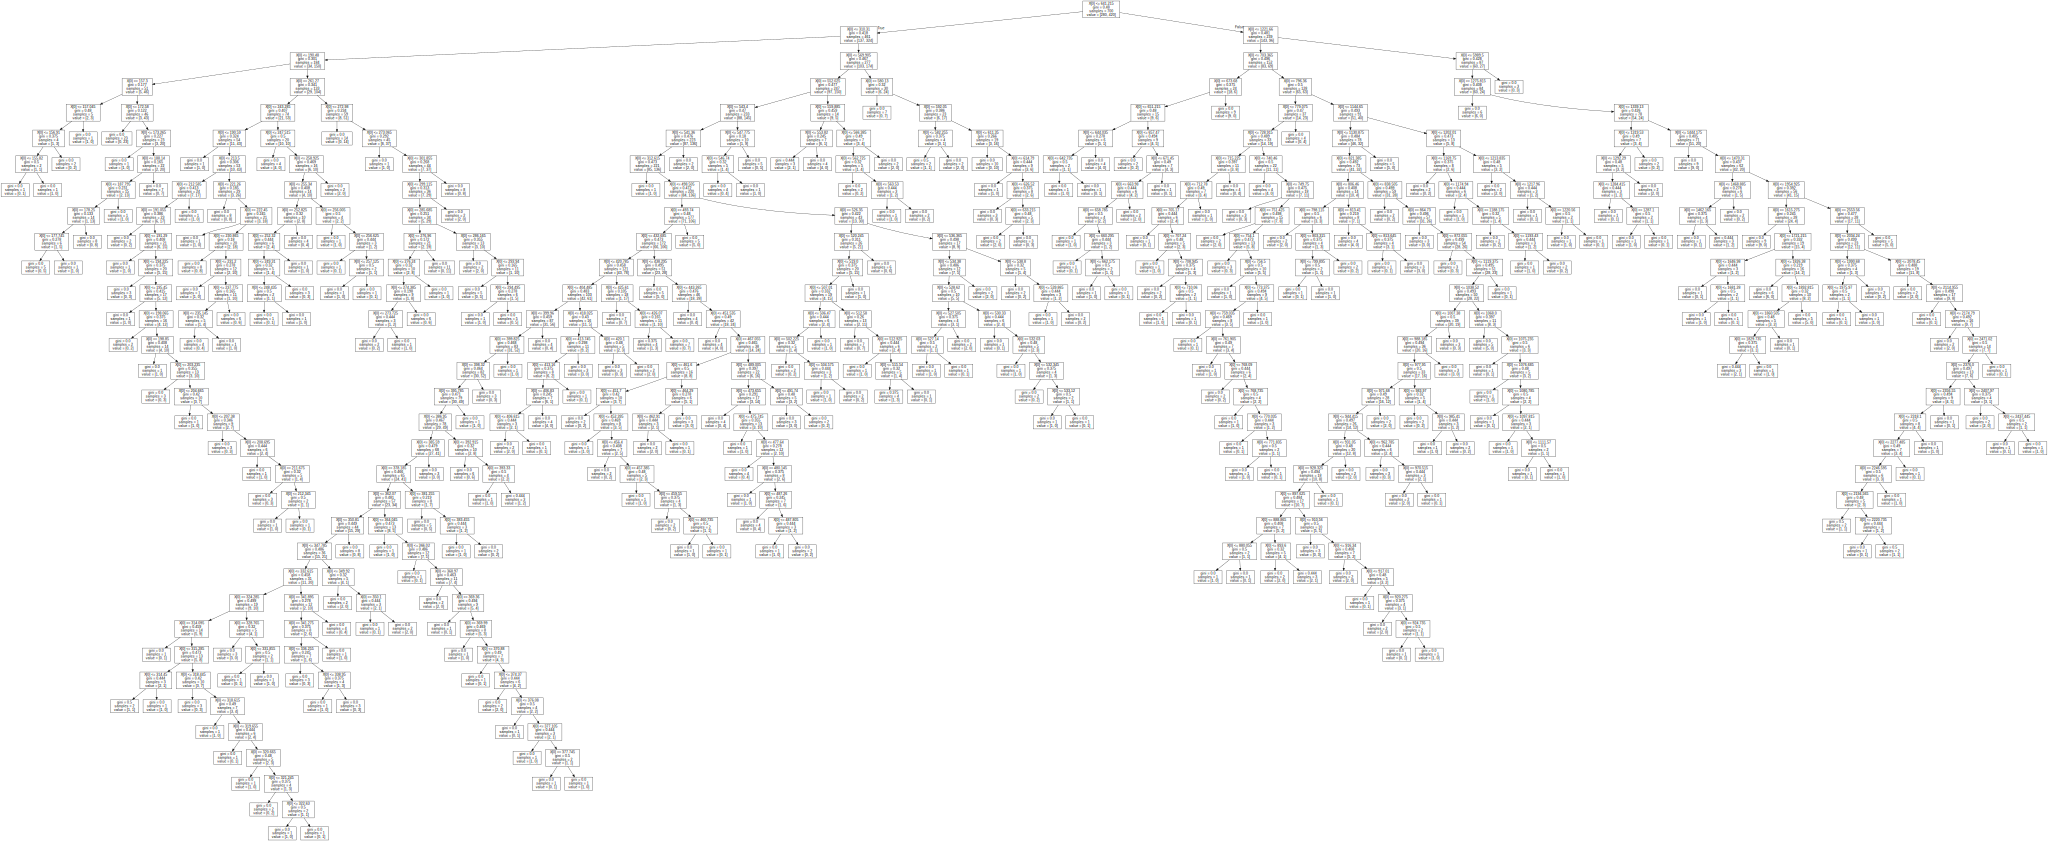

In [28]:
graph = graphviz.Source(re, format="png") 
graph

In [29]:
confusion_matrix(y_test_1,model_1.predict(x_test_1))

array([[ 62,  65],
       [ 66, 107]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


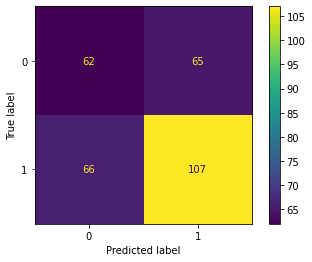

In [30]:
plot_confusion_matrix(model_1, x_test_1, y_test_1)
plt.show()

In [31]:
model_1.score(x_test_1,y_test_1)# model accuracy on test data

0.5633333333333334

In [32]:
#  In the first case we were predicting the funding status on the basis of Goals and Number of donors,
#  in this part the accuracy of the model on unseen data is 78.66%.
#  while in the second case the prediction is only based on the Goals column, when we removed a feature column and 
#  then repeat the same procedure the accuracy in that casse is 65%, that is we can say it got decreased by removing a feature column...